In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc, font_manager

rc('font', family="KoPubDotum_Pro")
plt.style.use('seaborn-paper')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('data_trail_v2.xlsx', index_col='매물번호')

In [3]:
df.index.is_unique

True

In [4]:
df.head()

,주소 1,상가성격,주거인구,직장인구,유동인구 반경 300m,유동인구반경 25m,유동인구 성격_남성,유동인구 성격_여성,유동인구 성격_10대,유동인구 성격_20대,유동인구 성격_30대,유동인구 성격_40대,유동인구 성격_50대,유동인구 성격_60대,주거인구 성격_남성,주거인구 성격_여성,주거인구 성격_10대미만,주거인구 성격_10대,주거인구 성격_20대,주거인구 성격_30대,주거인구 성격_40대,주거인구 성격_50대,주거인구 성격_60대,직장인구 성격_남성,직장인구 성격_여성,직장인구 성격_20대,직장인구 성격_30대,직장인구 성격_40대,직장인구 성격_50대,직장인구 성격_60대,D-5 월_매출액,D-4 월_매출액,D-4 월_증감률,D-3 월_매출액,D-3 월_증감률,D-2 월_매출액,D-2 월_증감률,D-1 월_매출액,D-1 월_증감률,D 월_매출액,D 월_증감률,총가구수,총인구수,주요시설수,집객시설수,아파트면적 (1m2)당기준시가,업소수,업소당가구수,업소당시설물수,지역매출,층수,계약면적,전용면적,권리금,보증금,월세,유동인구 성격 순위_1순위,유동인구 성격 순위_2순위,주거인구 성격 순위_1순위,주거인구 성격 순위_2순위,직장인구 성격 순위_1순위,직장인구 성격 순위_2순위,환산보증금
매물번호,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,강원도,근생상권,6604.0,2621,29457.0,47,0.545,0.455,0.108,0.122,0.197,0.246,0.201,0.125,0.479,0.521,0.122,0.146,0.111,0.179,0.205,0.138,0.099,0.416,0.584,0.178,0.248,0.267,0.209,0.098,1473.0,1570.0,0.0659,1536.0,-0.0217,1634.0,0.0638,1566,-0.0416,1587,0.0134,18274,46381,175,282,4300105,3219,6,0.14,1587,6.0,1400.0,761.7,0,3000,300.0,40,50,40,30,40,30,33000
8337,강원도,근생상권,1102.0,0,12917.0,7125,0.557,0.443,0.071,0.146,0.278,0.261,0.167,0.077,0.505,0.495,0.089,0.186,0.129,0.106,0.173,0.162,0.154,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1748.0,2033.0,0.1630,2152.0,0.0585,2368.0,0.1004,2322,-0.0194,2504,0.0784,12965,33396,95,149,6021295,1896,7,0.13,2504,1.0,0.0,34.0,0,5000,300.0,30,40,10,40,20,20,35000
8338,강원도,근생상권,1102.0,0,12917.0,7125,0.557,0.443,0.071,0.146,0.278,0.261,0.167,0.077,0.505,0.495,0.089,0.186,0.129,0.106,0.173,0.162,0.154,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1748.0,2033.0,0.1630,2152.0,0.0585,2368.0,0.1004,2322,-0.0194,2504,0.0784,12965,33396,95,149,6021295,1896,7,0.13,2504,1.0,0.0,28.0,0,5000,250.0,30,40,10,40,20,20,30000
22404,경기도,근생상권,176.0,198,11654.0,4264,0.453,0.547,0.060,0.104,0.191,0.243,0.229,0.173,0.511,0.489,0.040,0.074,0.125,0.091,0.142,0.205,0.330,0.520,0.480,0.182,0.248,0.217,0.182,0.172,2411.0,3706.0,0.5371,4964.0,0.3394,3629.0,-0.2689,2632,-0.2747,3584,0.3617,8848,19750,102,289,3035956,1543,6,0.25,3584,1.0,0.0,52.0,0,20000,700.0,40,50,60,50,30,40,90000
22405,경기도,근생상권,176.0,198,11654.0,4264,0.453,0.547,0.060,0.104,0.191,0.243,0.229,0.173,0.511,0.489,0.040,0.074,0.125,0.091,0.142,0.205,0.330,0.520,0.480,0.182,0.248,0.217,0.182,0.172,2411.0,3706.0,0.5371,4964.0,0.3394,3629.0,-0.2689,2632,-0.2747,3584,0.3617,8848,19750,102,289,3035956,1543,6,0.25,3584,2.0,0.0,67.0,0,10000,300.0,40,50,60,50,30,40,40000


### 1. Preprocessing

In [5]:
cols = df.columns.str.replace(" ", "")

df.columns = cols

In [6]:
df1 = df.fillna(df.median())
df1['상가성격'] = df1['상가성격'].str.strip()

# target label
df1['환산보증금'] = df1['월세']*100 + df1['보증금'] + df1['권리금']

In [7]:
df1_num = df1._get_numeric_data()

In [8]:
# remove outliers
from scipy import stats

normal_idx = df1_num[(np.abs(stats.zscore(df1_num)) < 3).all(axis=1)].index

In [9]:
# select only normal dist
df2 = df1.ix[normal_idx]

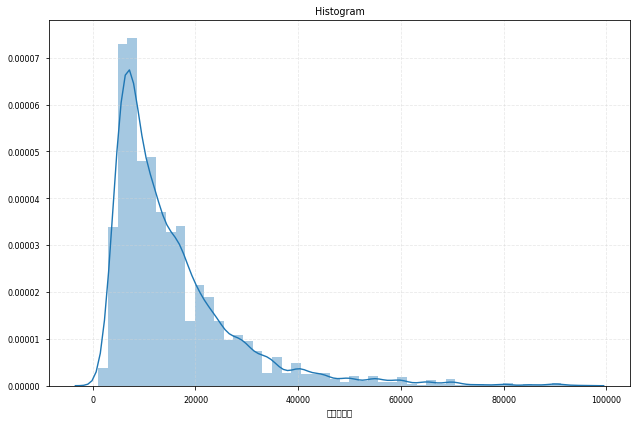

In [10]:
plt.figure(figsize=(9,6))

sns.distplot(df2['환산보증금'])

plt.title("Histogram")
#plt.ylabel("Unique User Count")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [11]:
# unit: k
df2['환산보증금'].describe().round(2) 

count    12118.00
mean     15540.54
std      12307.40
min       1100.00
25%       7000.00
50%      12000.00
75%      19500.00
max      95000.00
Name: 환산보증금, dtype: float64

In [12]:
df2['월세'].describe().round(2) 

count    12118.00
mean       132.39
std        105.80
min         10.00
25%         60.00
50%        100.00
75%        167.25
max        800.00
Name: 월세, dtype: float64

In [13]:
df2['보증금'].describe().round(2) 

count    12118.00
mean      2275.35
std       2015.01
min        100.00
25%       1000.00
50%       2000.00
75%       3000.00
max      15000.00
Name: 보증금, dtype: float64

In [14]:
s = df2['권리금'] 

print(len(s[s == 0]))

11953


In [15]:
s[s >= 1].describe().round(2) 

count     165.00
mean     1891.82
std       862.01
min        50.00
25%      1000.00
50%      2000.00
75%      2800.00
max      3000.00
Name: 권리금, dtype: float64

In [16]:
df2.groupby("주소1")['환산보증금'].describe().T

주소1,경기도,경상남도,부산시,서울시,인천시
count,7895.000000,1.0,16.000000,4137.000000,69.000000
mean,14348.438252,21500.0,18418.750000,17788.760938,16391.304348
std,11735.849769,NaN,8745.224888,13049.131589,12349.943309
min,1100.000000,21500.0,6500.000000,1200.000000,3800.000000
25%,7000.000000,21500.0,12500.000000,8700.000000,8000.000000
50%,11000.000000,21500.0,15800.000000,14000.000000,13000.000000
75%,18000.000000,21500.0,23250.000000,23000.000000,18400.000000
max,92500.000000,21500.0,35000.000000,95000.000000,65000.000000


In [17]:
df3 = df2.query("주소1 == '경기도' or 주소1 == '서울시'")

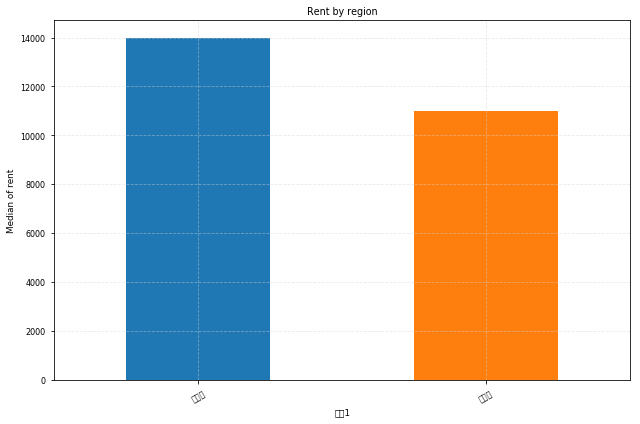

In [18]:
plt.figure(figsize=(9,6))

df3.groupby("주소1")['환산보증금'].median().sort_values(ascending=False).plot(kind='bar', rot=30)

plt.title("Rent by region")
plt.ylabel("Median of rent")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [19]:
df3.groupby("주소1")['환산보증금'].describe().T

주소1,경기도,서울시
count,7895.000000,4137.000000
mean,14348.438252,17788.760938
std,11735.849769,13049.131589
min,1100.000000,1200.000000
25%,7000.000000,8700.000000
50%,11000.000000,14000.000000
75%,18000.000000,23000.000000
max,92500.000000,95000.000000


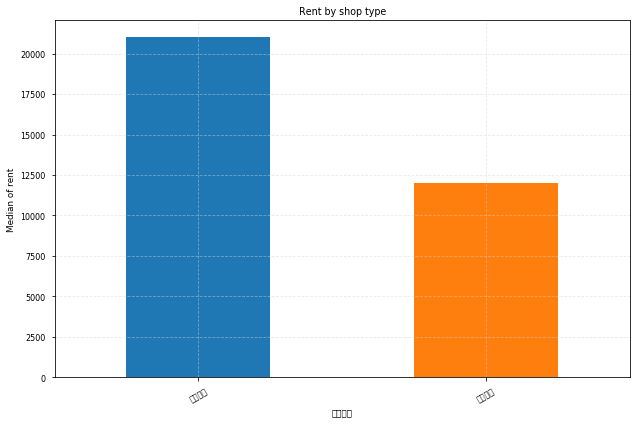

In [20]:
plt.figure(figsize=(9,6))

df1.groupby("상가성격")['환산보증금'].median().sort_values(ascending=False).plot(kind='bar', rot=30)

plt.title("Rent by shop type")
plt.ylabel("Median of rent")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [21]:
df3.groupby("상가성격")['환산보증금'].describe().T.round(2)

상가성격,근생상권,일반상권
count,9808.00,2224.00
mean,14199.84,21403.32
std,11164.54,15104.42
min,1100.00,1100.00
25%,7000.00,10500.00
50%,11000.00,17500.00
75%,18000.00,28000.00
max,95000.00,92500.00


In [22]:
df3.columns

Index(['주소1', '상가성격', '주거인구', '직장인구', '유동인구반경300m', '유동인구반경25m', '유동인구성격_남성',
       '유동인구성격_여성', '유동인구성격_10대', '유동인구성격_20대', '유동인구성격_30대', '유동인구성격_40대',
       '유동인구성격_50대', '유동인구성격_60대', '주거인구성격_남성', '주거인구성격_여성', '주거인구성격_10대미만',
       '주거인구성격_10대', '주거인구성격_20대', '주거인구성격_30대', '주거인구성격_40대', '주거인구성격_50대',
       '주거인구성격_60대', '직장인구성격_남성', '직장인구성격_여성', '직장인구성격_20대', '직장인구성격_30대',
       '직장인구성격_40대', '직장인구성격_50대', '직장인구성격_60대', 'D-5월_매출액', 'D-4월_매출액',
       'D-4월_증감률', 'D-3월_매출액', 'D-3월_증감률', 'D-2월_매출액', 'D-2월_증감률', 'D-1월_매출액',
       'D-1월_증감률', 'D월_매출액', 'D월_증감률', '총가구수', '총인구수', '주요시설수', '집객시설수',
       '아파트면적(1m2)당기준시가', '업소수', '업소당가구수', '업소당시설물수', '지역매출', '층수', '계약면적',
       '전용면적', '권리금', '보증금', '월세', '유동인구성격순위_1순위', '유동인구성격순위_2순위',
       '주거인구성격순위_1순위', '주거인구성격순위_2순위', '직장인구성격순위_1순위', '직장인구성격순위_2순위',
       '환산보증금'],
      dtype='object')

<Figure size 648x432 with 0 Axes>

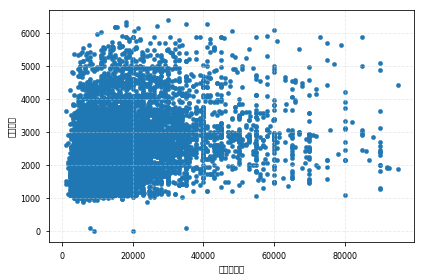

In [23]:
plt.figure(figsize=(9,6))

df3.plot(kind='scatter', x='환산보증금', y='지역매출');

#plt.title("Rent by shop type")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [24]:
print(df3[['환산보증금', '유동인구반경300m']].corr())

               환산보증금  유동인구반경300m
환산보증금       1.000000    0.270331
유동인구반경300m  0.270331    1.000000


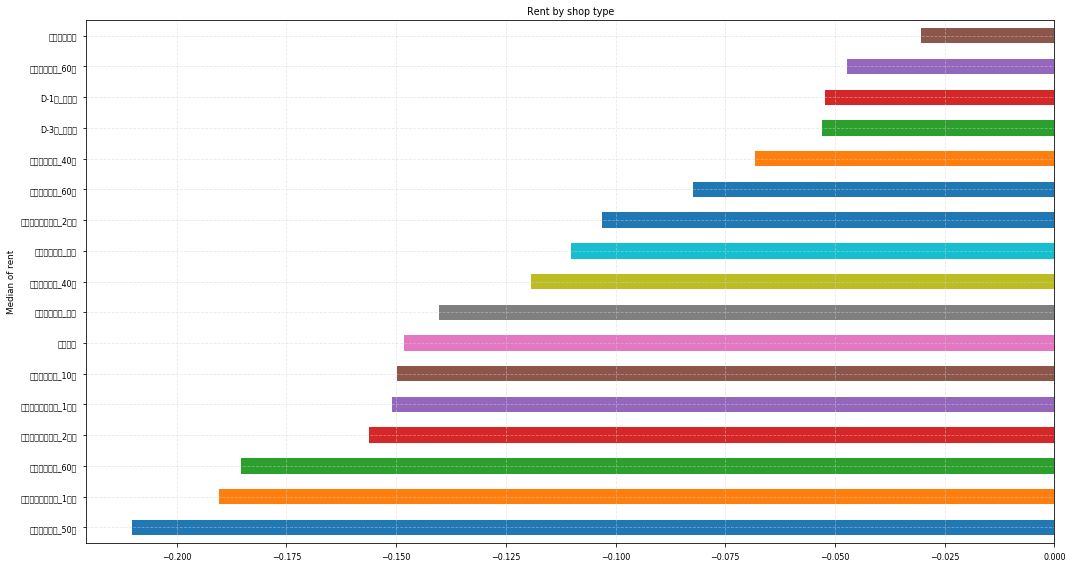

In [25]:
plt.figure(figsize=(15,8))

df3.corr()['환산보증금'].sort_values()[3:20].plot(kind='barh')

plt.title("Rent by shop type")
plt.ylabel("Median of rent")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [26]:
df3.corr()['환산보증금'].sort_values(ascending=False)[20:]

유동인구성격_여성       0.140288
층수              0.121150
유동인구반경25m       0.119577
주거인구성격_여성       0.110105
업소수             0.094157
계약면적            0.090310
주요시설수           0.088494
집객시설수           0.083290
총가구수            0.050684
직장인구성격_남성       0.025357
                  ...   
주거인구           -0.148293
주거인구성격_10대     -0.149856
주거인구성격순위_1순위   -0.150877
주거인구성격순위_2순위   -0.156234
직장인구성격_60대     -0.185344
직장인구성격순위_1순위   -0.190370
주거인구성격_50대     -0.210195
유동인구성격순위_1순위   -0.212056
직장인구성격_50대     -0.258852
유동인구성격_50대     -0.259060
Name: 환산보증금, Length: 41, dtype: float64

In [27]:
df3.iloc[:,20:40]

,주거인구성격_40대,주거인구성격_50대,주거인구성격_60대,직장인구성격_남성,직장인구성격_여성,직장인구성격_20대,직장인구성격_30대,직장인구성격_40대,직장인구성격_50대,직장인구성격_60대,D-5월_매출액,D-4월_매출액,D-4월_증감률,D-3월_매출액,D-3월_증감률,D-2월_매출액,D-2월_증감률,D-1월_매출액,D-1월_증감률,D월_매출액
매물번호,,,,,,,,,,,,,,,,,,,,
9968,0.186,0.164,0.202,0.465,0.535,0.074,0.144,0.283,0.307,0.193,1755.0,1866.0,0.0632,1872.0,0.0032,1830.0,-0.0224,1935,0.0574,1675
21601,0.118,0.176,0.235,0.591,0.409,0.179,0.283,0.295,0.182,0.061,2845.0,2866.0,0.0074,3257.0,0.1364,3498.0,0.0740,3483,-0.0043,3435
18904,0.166,0.197,0.240,0.437,0.563,0.082,0.158,0.253,0.303,0.205,2870.0,2636.0,-0.0815,3048.0,0.1563,2959.0,-0.0292,2974,0.0051,2888
19021,0.177,0.170,0.216,0.453,0.547,0.058,0.144,0.229,0.329,0.240,1666.0,1870.0,0.1224,2053.0,0.0979,1867.0,-0.0906,1906,0.0209,1783
23933,0.177,0.170,0.216,0.451,0.549,0.057,0.142,0.231,0.330,0.240,1666.0,1870.0,0.1224,2053.0,0.0979,1867.0,-0.0906,1906,0.0209,1783
18129,0.169,0.171,0.147,0.554,0.446,0.193,0.284,0.264,0.191,0.068,2552.0,2543.0,-0.0035,2839.0,0.1164,2594.0,-0.0863,3005,0.1584,3199
3260,0.156,0.156,0.176,0.558,0.442,0.190,0.284,0.265,0.195,0.066,2065.0,2500.0,0.2107,2460.0,-0.0160,2745.0,0.1159,2511,-0.0852,2790
26663,0.158,0.158,0.174,0.554,0.446,0.193,0.284,0.264,0.191,0.068,2440.0,2716.0,0.1131,2496.0,-0.0810,2862.0,0.1466,3052,0.0664,2891
18182,0.158,0.158,0.174,0.554,0.446,0.193,0.284,0.264,0.191,0.068,2433.0,2440.0,0.0029,2716.0,0.1131,2496.0,-0.0810,2862,0.1466,3052


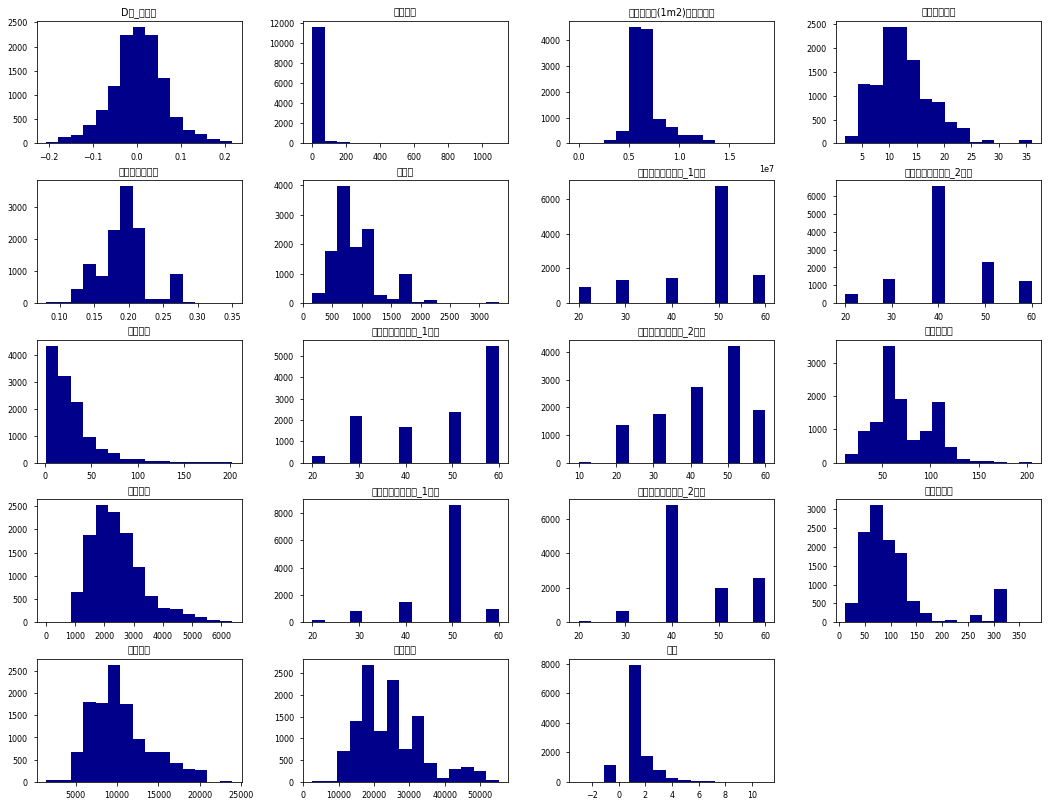

In [28]:
df3.iloc[:,40:].drop(['권리금', '보증금', '월세', '환산보증금'],
                    axis=1).hist(bins=15, color='darkblue', figsize=(18,14), grid=False);

In [29]:
df4 = df3.drop(['권리금', '보증금', '월세', '계약면적'], axis=1)

In [30]:
df4.head()

,주소1,상가성격,주거인구,직장인구,유동인구반경300m,유동인구반경25m,유동인구성격_남성,유동인구성격_여성,유동인구성격_10대,유동인구성격_20대,유동인구성격_30대,유동인구성격_40대,유동인구성격_50대,유동인구성격_60대,주거인구성격_남성,주거인구성격_여성,주거인구성격_10대미만,주거인구성격_10대,주거인구성격_20대,주거인구성격_30대,주거인구성격_40대,주거인구성격_50대,주거인구성격_60대,직장인구성격_남성,직장인구성격_여성,직장인구성격_20대,직장인구성격_30대,직장인구성격_40대,직장인구성격_50대,직장인구성격_60대,D-5월_매출액,D-4월_매출액,D-4월_증감률,D-3월_매출액,D-3월_증감률,D-2월_매출액,D-2월_증감률,D-1월_매출액,D-1월_증감률,D월_매출액,D월_증감률,총가구수,총인구수,주요시설수,집객시설수,아파트면적(1m2)당기준시가,업소수,업소당가구수,업소당시설물수,지역매출,층수,전용면적,유동인구성격순위_1순위,유동인구성격순위_2순위,주거인구성격순위_1순위,주거인구성격순위_2순위,직장인구성격순위_1순위,직장인구성격순위_2순위,환산보증금
매물번호,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9968,경기도,일반상권,6270.0,1454,28452.0,337,0.598,0.402,0.072,0.091,0.157,0.229,0.242,0.210,0.496,0.504,0.081,0.113,0.108,0.147,0.186,0.164,0.202,0.465,0.535,0.074,0.144,0.283,0.307,0.193,1755.0,1866.0,0.0632,1872.0,0.0032,1830.0,-0.0224,1935,0.0574,1675,-0.1344,14151,34155,100,119,4749909,1141,12,0.19,1675,2.0,72.0,50,40,60,40,50,40,16000.0
21601,경기도,일반상권,17.0,3441,15281.0,512,0.604,0.396,0.040,0.115,0.214,0.246,0.211,0.173,0.529,0.471,0.118,0.118,0.118,0.176,0.118,0.176,0.235,0.591,0.409,0.179,0.283,0.295,0.182,0.061,2845.0,2866.0,0.0074,3257.0,0.1364,3498.0,0.0740,3483,-0.0043,3435,-0.0138,4722,12009,35,45,9770145,839,6,0.10,3435,1.0,20.0,40,30,60,30,40,30,17000.0
18904,경기도,근생상권,6847.0,5401,48112.0,254,0.594,0.406,0.048,0.106,0.166,0.237,0.252,0.191,0.482,0.518,0.062,0.088,0.134,0.113,0.166,0.197,0.240,0.437,0.563,0.082,0.158,0.253,0.303,0.205,2870.0,2636.0,-0.0815,3048.0,0.1563,2959.0,-0.0292,2974,0.0051,2888,-0.0289,10611,25376,134,189,6005426,1746,6,0.18,2888,1.0,14.5,50,40,60,50,50,40,20000.0
19021,경기도,근생상권,8812.0,2338,43133.0,145,0.576,0.424,0.052,0.114,0.161,0.225,0.238,0.210,0.484,0.516,0.076,0.091,0.138,0.133,0.177,0.170,0.216,0.453,0.547,0.058,0.144,0.229,0.329,0.240,1666.0,1870.0,0.1224,2053.0,0.0979,1867.0,-0.0906,1906,0.0209,1783,-0.0645,10611,25376,134,189,6005426,1746,6,0.18,1783,1.0,50.0,50,40,60,40,50,60,40000.0
23933,경기도,근생상권,9043.0,2389,39523.0,145,0.578,0.422,0.050,0.110,0.158,0.226,0.240,0.216,0.484,0.516,0.076,0.091,0.138,0.132,0.177,0.170,0.216,0.451,0.549,0.057,0.142,0.231,0.330,0.240,1666.0,1870.0,0.1224,2053.0,0.0979,1867.0,-0.0906,1906,0.0209,1783,-0.0645,10611,25376,134,189,6005426,1746,6,0.18,1783,1.0,65.0,50,40,60,40,50,60,28000.0


In [31]:
dum_addr = pd.get_dummies(df4['주소1'])
dum_type = pd.get_dummies(df4['상가성격'])

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df4_scaled = df4.drop(['주소1', '상가성격', '환산보증금'], axis=1).copy()

for c in df4_scaled:
    df4_scaled[c] = StandardScaler().fit_transform(np.array(df4_scaled[c]).reshape(-1, 1)).round(4)

In [33]:
df4_scaled.head()

,주거인구,직장인구,유동인구반경300m,유동인구반경25m,유동인구성격_남성,유동인구성격_여성,유동인구성격_10대,유동인구성격_20대,유동인구성격_30대,유동인구성격_40대,유동인구성격_50대,유동인구성격_60대,주거인구성격_남성,주거인구성격_여성,주거인구성격_10대미만,주거인구성격_10대,주거인구성격_20대,주거인구성격_30대,주거인구성격_40대,주거인구성격_50대,주거인구성격_60대,직장인구성격_남성,직장인구성격_여성,직장인구성격_20대,직장인구성격_30대,직장인구성격_40대,직장인구성격_50대,직장인구성격_60대,D-5월_매출액,D-4월_매출액,D-4월_증감률,D-3월_매출액,D-3월_증감률,D-2월_매출액,D-2월_증감률,D-1월_매출액,D-1월_증감률,D월_매출액,D월_증감률,총가구수,총인구수,주요시설수,집객시설수,아파트면적(1m2)당기준시가,업소수,업소당가구수,업소당시설물수,지역매출,층수,전용면적,유동인구성격순위_1순위,유동인구성격순위_2순위,주거인구성격순위_1순위,주거인구성격순위_2순위,직장인구성격순위_1순위,직장인구성격순위_2순위
매물번호,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9968,-1.1899,-0.9881,-0.1460,-0.4112,0.2912,-0.2912,2.1878,-1.3010,-2.2981,1.1523,0.7344,0.9415,-0.0547,0.0548,0.6393,0.9254,-1.8434,-0.5354,1.2541,-0.3717,0.4714,0.4158,-0.4158,-0.8593,-0.9897,2.0916,1.0025,-0.2981,-0.4964,-0.4787,0.0117,-0.5501,-0.3818,-0.6324,-0.6504,-0.5519,0.6781,-0.8440,-2.2438,1.0286,1.0649,1.0170,0.1833,-1.0878,0.6085,-0.1454,-0.0400,-0.8440,0.6631,1.7473,0.3937,-0.2159,0.9076,-0.2303,0.2961,-0.5715
21601,-3.7069,-0.2664,-0.6767,-0.2998,0.4750,-0.4750,-1.1892,-0.6148,1.4087,2.1102,-0.4577,-0.6742,2.1318,-2.1314,2.8950,1.1489,-1.4157,0.4474,-3.2124,0.2508,1.3996,2.6066,-2.6066,1.8274,2.6788,2.6412,-2.1212,-3.1695,0.8295,0.6534,-0.5243,1.0553,1.3833,1.2218,0.7440,1.2045,-0.3104,1.1209,-0.2922,-1.5562,-1.3663,-1.2744,-0.8208,1.6376,-0.1670,-1.3090,-2.7559,1.1209,-0.1980,-0.3241,-0.5249,-1.3000,0.9076,-1.0386,-1.0354,-1.6739
18904,-0.9577,0.4454,0.6463,-0.4640,0.1687,-0.1687,-0.3450,-0.8722,-1.7129,1.6030,1.1189,0.1118,-0.9823,0.9823,-0.5190,-0.1918,-0.7313,-1.6876,-0.0596,1.3401,1.5402,-0.0711,0.0711,-0.6546,-0.6202,0.7177,0.9025,-0.0371,0.8599,0.3930,-1.3782,0.8131,1.6470,0.6226,-0.7488,0.6270,-0.1598,0.5103,-0.5365,0.0582,0.1012,2.2155,1.1331,-0.4062,2.1621,-1.3090,-0.3417,0.5103,-0.1980,-0.5432,0.3937,-0.2159,0.9076,0.5780,0.2961,-0.5715
19021,-0.1667,-0.6670,0.4457,-0.5333,-0.3827,0.3827,0.0772,-0.6434,-2.0380,0.9269,0.5806,0.9415,-0.8498,0.8498,0.3345,-0.0577,-0.5602,-1.0098,0.6630,-0.0605,0.8651,0.2071,-0.2071,-1.2687,-0.9897,-0.3814,1.5522,0.7243,-0.6047,-0.4742,0.5804,-0.3403,0.8731,-0.5913,-1.6369,-0.5849,0.0934,-0.7234,-1.1126,0.0582,0.1012,2.2155,1.1331,-0.4062,2.1621,-1.3090,-0.3417,-0.7234,-0.1980,0.8709,0.3937,-0.2159,0.9076,-0.2303,0.2961,1.6334
23933,-0.0737,-0.6485,0.3002,-0.5333,-0.3215,0.3215,-0.1339,-0.7578,-2.2331,0.9832,0.6575,1.2035,-0.8498,0.8498,0.3345,-0.0577,-0.5602,-1.0437,0.6630,-0.0605,0.8651,0.1724,-0.1724,-1.2943,-1.0425,-0.2898,1.5772,0.7243,-0.6047,-0.4742,0.5804,-0.3403,0.8731,-0.5913,-1.6369,-0.5849,0.0934,-0.7234,-1.1126,0.0582,0.1012,2.2155,1.1331,-0.4062,2.1621,-1.3090,-0.3417,-0.7234,-0.1980,1.4684,0.3937,-0.2159,0.9076,-0.2303,0.2961,1.6334


In [34]:
df4_scaled.describe().round(2)

,주거인구,직장인구,유동인구반경300m,유동인구반경25m,유동인구성격_남성,유동인구성격_여성,유동인구성격_10대,유동인구성격_20대,유동인구성격_30대,유동인구성격_40대,유동인구성격_50대,유동인구성격_60대,주거인구성격_남성,주거인구성격_여성,주거인구성격_10대미만,주거인구성격_10대,주거인구성격_20대,주거인구성격_30대,주거인구성격_40대,주거인구성격_50대,주거인구성격_60대,직장인구성격_남성,직장인구성격_여성,직장인구성격_20대,직장인구성격_30대,직장인구성격_40대,직장인구성격_50대,직장인구성격_60대,D-5월_매출액,D-4월_매출액,D-4월_증감률,D-3월_매출액,D-3월_증감률,D-2월_매출액,D-2월_증감률,D-1월_매출액,D-1월_증감률,D월_매출액,D월_증감률,총가구수,총인구수,주요시설수,집객시설수,아파트면적(1m2)당기준시가,업소수,업소당가구수,업소당시설물수,지역매출,층수,전용면적,유동인구성격순위_1순위,유동인구성격순위_2순위,주거인구성격순위_1순위,주거인구성격순위_2순위,직장인구성격순위_1순위,직장인구성격순위_2순위
count,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00,12032.00
mean,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.71,-1.51,-1.23,-0.63,-2.77,-3.14,-2.98,-1.79,-3.47,-2.57,-3.03,-3.73,-4.10,-5.78,-2.71,-2.69,-3.00,-2.70,-3.87,-3.74,-3.58,-2.66,-4.15,-2.75,-2.57,-3.27,-4.12,-3.54,-2.63,-2.59,-4.07,-2.72,-3.25,-2.67,-3.24,-2.75,-3.34,-2.71,-3.41,-2.48,-2.40,-2.09,-1.27,-3.67,-1.90,-2.08,-3.36,-2.71,-3.64,-1.08,-2.36,-2.38,-2.31,-2.66,-3.70,-2.78
25%,-0.61,-0.69,-0.67,-0.47,-0.72,-0.72,-0.66,-0.73,-0.67,-0.59,-0.77,-0.59,-0.65,-0.61,-0.64,-0.64,-0.65,-0.77,-0.72,-0.68,-0.57,-0.75,-0.54,-0.65,-0.65,-0.66,-0.52,-0.60,-0.72,-0.74,-0.81,-0.72,-0.69,-0.73,-0.68,-0.73,-0.64,-0.72,-0.56,-0.69,-0.65,-0.68,-0.59,-0.63,-0.59,-0.73,-0.64,-0.72,-0.20,-0.72,-0.52,-0.22,-0.70,-1.04,0.30,-0.57
50%,0.02,-0.28,-0.35,-0.28,0.03,-0.03,-0.03,-0.39,-0.22,0.14,-0.07,-0.11,-0.05,0.05,-0.03,-0.01,-0.22,-0.20,-0.06,0.10,-0.01,-0.14,0.14,-0.30,-0.22,-0.06,0.05,0.03,-0.15,-0.14,-0.21,-0.13,-0.05,-0.13,-0.09,-0.16,-0.07,-0.16,-0.00,-0.17,-0.05,-0.22,-0.29,-0.24,-0.29,-0.15,-0.04,-0.16,-0.20,-0.32,0.39,-0.22,0.10,0.58,0.30,-0.57
75%,0.66,0.36,0.27,0.08,0.72,0.72,0.60,0.53,0.43,0.65,0.93,0.59,0.61,0.65,0.46,0.66,0.34,0.48,0.53,0.72,0.70,0.54,0.75,0.34,0.30,0.67,0.78,0.64,0.47,0.49,0.78,0.50,0.62,0.50,0.63,0.51,0.58,0.52,0.60,0.53,0.62,0.84,0.13,0.19,0.45,0.44,0.56,0.52,-0.20,0.31,0.39,0.87,0.91,0.58,0.30,0.53
max,3.42,4.24,4.07,10.53,3.14,2.77,4.30,3.56,4.34,3.80,2.62,3.26,5.78,4.10,4.18,3.65,5.43,3.90,4.67,4.04,3.65,4.15,2.66,4.46,4.39,4.70,2.63,3.27,4.31,4.68,5.29,4.29,3.29,4.62,3.41,4.62,3.36,4.40,3.43,3.72,3.38,4.72,3.64,6.44,6.22,4.51,4.79,4.40,8.41,6.93,1.31,1.95,0.91,1.39,1.63,1.63


In [35]:
X = df4_scaled.join(dum_addr).join(dum_type)

In [36]:
y = df4['환산보증금']

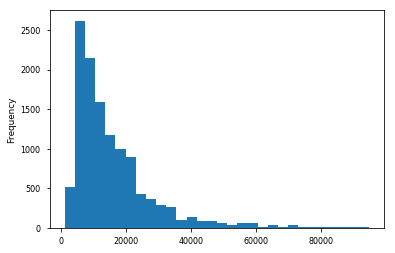

In [37]:
y.plot(kind='hist', bins=30)

In [38]:
y_log = np.log(df4['환산보증금'])

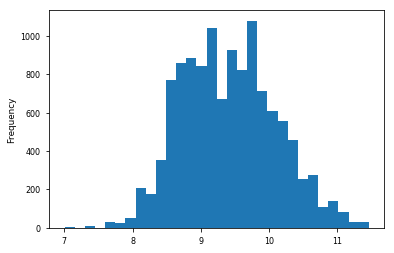

In [39]:
y_log.plot(kind='hist', bins=30)

In [40]:
print(y.shape)
print(y_log.shape)
print(X.shape)

(12032,)
(12032,)
(12032, 60)


### 2. Modeling

In [41]:
from sklearn.model_selection import train_test_split

# split train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X.shape)

(9024, 60)
(9024,)
(3008, 60)
(3008,)
(12032, 60)


In [43]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

In [44]:
print(lr.score(X_train, y_train)) # R-sqaured)
print(lr.score(X_test, y_test)) # R-sqaured

0.3595993770779078
0.31464898847550404


In [45]:
pred = lr.predict(X_test)
true = np.array(y_test)

In [46]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R-sqaure:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

R-sqaure: 0.31464898847550404
MAE: 6953.271851387713
MSE: 108192518.18107134
RMSE: 10401.563256600968


In [47]:
res_table = pd.concat([pd.Series(pred), y_test.reset_index(drop=True)], axis=1)
res_table.columns = ['예측', '실제']

res_table['잔차'] = res_table['예측'] - res_table['실제']

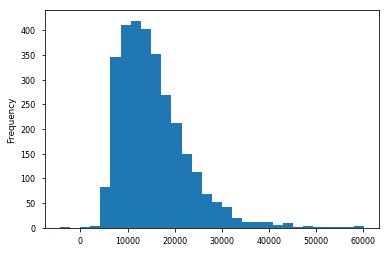

In [48]:
res_table['예측'].plot(kind='hist', bins=30)

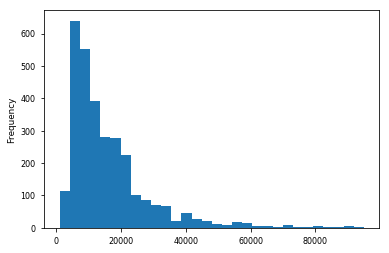

In [49]:
res_table['실제'].plot(kind='hist', bins=30)

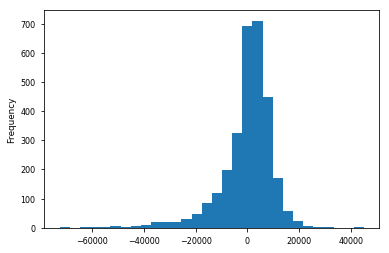

In [50]:
res_table['잔차'].plot(kind='hist', bins=30)

In [51]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

lasso = linear_model.Lasso()

# set params
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# grid search
grid_search = GridSearchCV(lasso, param_grid, cv=5)

# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
print('when grid searching: ', grid_search.best_score_)
print('at the trainset:, ', grid_search.score(X_test, y_test))

when grid searching:  0.34520980127565554
at the trainset:,  0.31557657841653497


In [53]:
pred = grid_search.predict(X_test)
true = np.array(y_test)

In [54]:
print("R-sqaure:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

R-sqaure: 0.31557657841653497
MAE: 6949.973277062315
MSE: 108046084.76246978
RMSE: 10394.521863100283


In [55]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

ridge = linear_model.Ridge()

# set params
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# grid search
grid_search = GridSearchCV(ridge, param_grid, cv=5)

# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
print('when grid searching: ', grid_search.best_score_)
print('at the trainset:, ', grid_search.score(X_test, y_test))

when grid searching:  0.3453144335084109
at the trainset:,  0.3149741969216586


In [57]:
pred = grid_search.predict(X_test)
true = np.array(y_test)

In [58]:
print("R-sqaure:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

R-sqaure: 0.3149741969216586
MAE: 6951.148168449575
MSE: 108141179.34866054
RMSE: 10399.095121627677


In [59]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression

def pipeline_reg_kbest(X_train, y_train):

    select = SelectKBest(score_func=f_regression)
    scaler = StandardScaler()
    lasso = Lasso()

    pipe = Pipeline([('scaler', scaler), ('feature_selection', select), ('model', lasso)])
    param_grid = [{'feature_selection__k': [20],
                  'model__alpha': [0.01, 0.1, 1, 10],
                  }]
    grid_search = GridSearchCV(pipe, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    return grid_search

In [60]:
grid_search_kbest = pipeline_reg_kbest(X_train, y_train)

In [61]:
print("best score: ", grid_search_kbest.best_estimator_)
print("best score: ", grid_search_kbest.best_score_)
print("best params: ", grid_search_kbest.best_params_)

best score:  Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('feature_selection', SelectKBest(k=20, score_func=<function f_regression at 0x1a1b2d2488>)), ('model', Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])
best score:  0.3317623587758509
best params:  {'feature_selection__k': 20, 'model__alpha': 10}


In [62]:
pred = grid_search_kbest.predict(X_test)
true = np.array(y_test)

print("R-sqaure:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

R-sqaure: 0.30236648082770634
MAE: 7024.818364912595
MSE: 110131488.73725034
RMSE: 10494.3550891539


In [63]:
res_table = pd.concat([pd.Series(pred), y_test.reset_index(drop=True)], axis=1)
res_table.columns = ['예측', '실제']

res_table['잔차'] = res_table['예측'] - res_table['실제']

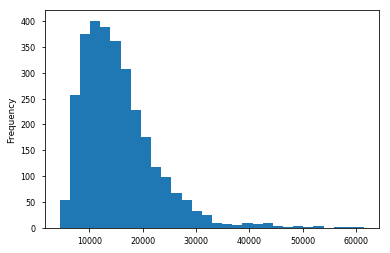

In [64]:
res_table['예측'].plot(kind='hist', bins=30)

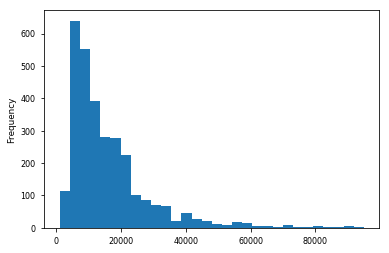

In [65]:
res_table['실제'].plot(kind='hist', bins=30)

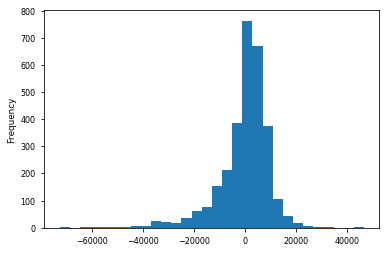

In [66]:
res_table['잔차'].plot(kind='hist', bins=30)

### 정리
- standard, ln default, y -> 0.31  / 10401.6
- standard, ln default, y log -> 0.34 / 11664.7
- minmax, ln default, y -> 0.31 / 10443
- minmax, ln default, y log -> 0.33 / 11275
- standard, lasso alpha:1.0, y -> 0.32 / 10394
- standard, ridge alpha:1.0, y -> 0.31 / 10399
- pipe, ridge k=20 alpha: 10, y -> 0.30 / 10495
- pipe, lasso k=30 alpha: 0.1, y-> 0.31 / 10410
- pipe, lasso k=20 alpah: 10, y-> 0.30 / 10494 (final)

In [67]:
select = grid_search_kbest.best_estimator_.named_steps['feature_selection']

X_new = select.transform(X_train)
X_new.shape
print(select.get_support(indices=True))

[ 1  2 10 17 19 23 24 26 28 29 31 33 35 37 47 49 50 54 58 59]


In [72]:
coefs = pd.Series(grid_search_kbest.best_estimator_.named_steps['model'].coef_).round(2)
cols = pd.Series(X_train.columns[select.get_support(indices=True)])

res_fin = pd.concat([coefs, cols], axis=1, ignore_index=True)
res_fin.columns = ['coef', 'features']
res_fin.sort_values(by='coef', ascending=False)[:20]

,coef,features
15,5524.04,전용면적
10,3443.18,D-3월_매출액
1,920.97,유동인구반경300m
6,829.98,직장인구성격_30대
8,585.61,D-5월_매출액
0,261.99,직장인구
3,237.20,주거인구성격_30대
16,177.09,유동인구성격순위_1순위
7,17.29,직장인구성격_50대
12,0.00,D-1월_매출액


In [69]:
len(res_fin.sort_values(by='coef', ascending=False))

20

In [70]:
grid_search_kbest.best_estimator_.named_steps['model'].intercept_

15457.716090425532

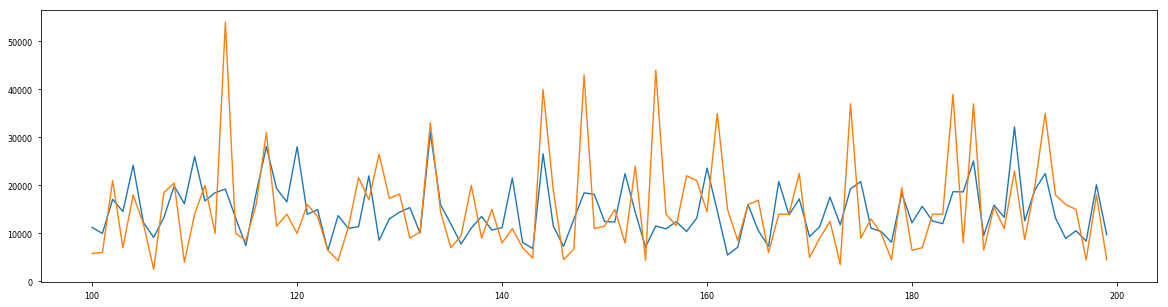

In [71]:
#ploting
pd.Series(pred)[100:200].plot(figsize=(20,5))
pd.Series(true)[100:200].plot(figsize=(20,5))